Notebook de Statistiques

In [2]:
#Importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Importation des données CSV
quest1 = pd.read_csv("datas/quest1.csv", encoding="latin-1")
quest2 = pd.read_csv("datas/quest2.csv", encoding="latin-1")
quest3 = pd.read_csv("datas/quest3.csv", encoding="latin-1")

effec1 = pd.read_csv("datas/effec1.csv", encoding="latin-1")
effec2 = pd.read_csv("datas/effec2.csv", encoding="latin-1")
effec3 = pd.read_csv("datas/effec3.csv", encoding="latin-1")

#Ajout des Itérations avant le concat
quest1["iteration"] = 1
quest2["iteration"] = 2
quest3["iteration"] = 3

Dans un premier temps, regroupons les différents DF afin d'effectuer notre analyse?

In [3]:
merged_quest = pd.concat([quest1,quest2], ignore_index = True)

In [4]:
merged_quest = pd.concat([merged_quest,quest3], ignore_index = True)

In [5]:
#merge effec
merged_effec =  pd.concat([effec1,effec2], ignore_index = True)
merged_effec =  pd.concat([merged_effec,effec3], ignore_index = True)

In [6]:
#final_merge = pd.concat([merged_quest, merged_effec], axis = 1)
#now let match student Ids from both left and right DF
final_merge = merged_quest.merge(merged_effec, on='Student_ID', how='inner')

In [7]:
#addinf iteration at the end
cut_iteration = final_merge.pop("iteration")
final_merge["iteration"] = cut_iteration

Nous allons ensuite calculer le nombre de vidéos regardées par chaque participant et rentrer la valeur calculer dans une nouvelle colonne "nb_video".
Nous comptons aussi le nombre de quizz en filtrant les colonnes comprenant le mot quizz bin puis en faisant la somme qui est ajouté dans une colonne 
"nb_quizz".

In [8]:
final_merge["nb_video"] = final_merge.loc[:, "S1.L1":"S5.L5"].sum(axis=1)
# Filter columns that contain both "quizz" and "bin"
quizz_bin_columns = final_merge.columns[final_merge.columns.str.contains(r'quizz.*bin', case=False)]

# Convert the result to a list if needed
quizz_bin_columns = quizz_bin_columns.tolist()
final_merge["nb_quizz"] = final_merge[quizz_bin_columns].sum(axis=1)
final_merge.head(100)

,Student_ID,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,...,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice,Post.forum.fonc.cours,view.forum.fonc.cours,iteration,nb_video,nb_quizz
0,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,NaN,NaN,NaN,1,0,0
1,19178.0,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,0,0,2,0,NaN,NaN,NaN,1,1,0
2,1086.0,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,...,1,1,35,4,NaN,NaN,NaN,1,34,4
3,1948.0,une femme,1983.0,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,...,0,0,2,0,NaN,NaN,NaN,1,1,0
4,16209.0,une femme,NaN,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, ph...",Professions intermédiaires,par un ami ou une connaissance,Jai un projet de création dentreprise (phase...,1.0,...,0,0,0,5,NaN,NaN,NaN,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15557.0,une femme,1983.0,Maroc,Bac+5 (Master ou équivalent),Gestion d'entreprise,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,0,0,1,0,NaN,NaN,NaN,1,0,0
96,14070.0,un homme,1969.0,France,"Bac+2 (Deug, IUT, BTS ou équivalent)","Mathématiques\, informatique",Cadres et professions intellectuelles,par un article ou un blog sur Internet,Jai déjà créé plusieurs entreprises,1.0,...,1,1,35,5,NaN,NaN,NaN,1,33,5
97,16560.0,un homme,1988.0,France,Bac ou équivalent,"Mathématiques\, informatique",Etudiants,par un ami ou une connaissance,Je n'ai aucune expérience en création d'entrep...,3.0,...,0,0,4,0,NaN,NaN,NaN,1,3,0
98,11069.0,un homme,1959.0,Canada francophone (Québec),Bac+5 (Master ou équivalent),"Mathématiques\, informatique",Cadres et professions intellectuelles,par un article ou un blog sur Internet,"Jai déjà créé plusieurs entreprises,J'accompa...",4.0,...,0,0,22,3,NaN,NaN,NaN,1,16,3


Nous créons ensuite les catégories d'apprenant

In [9]:
final_merge.loc[
    (final_merge["Exam.bin"] == 1) | (final_merge["Certif.bin"] == 1),
    "Cat.participant"] = "Completer"

final_merge.loc[
    ((final_merge["Assignment.bin"] >= 1) | (final_merge["nb_quizz"] >= 1)) &
    ((final_merge["Certif.bin"] == 0) | (final_merge["Exam.bin"] == 0)),
    "Cat.participant"
] = "disengaging learners"

final_merge.loc[
    (final_merge["nb_quizz"] == 0) & (final_merge["Assignment.bin"] == 0) &
    (final_merge["nb_video"] >= 6),
    "Cat.participant"
] = "auditing learner"

final_merge.loc[
    (final_merge["nb_quizz"] == 0) & (final_merge["Assignment.bin"] == 0) &
    (final_merge["nb_video"] < 6),
    "Cat.participant"
] = "bystander"


final_merge.loc[(final_merge["Country_HDI.fin"] == "H&M"),
"Country_HDI.fin"
] = "I"

final_merge.head(100)

,Student_ID,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,...,view.forum.5.2,last.video,last.quizz,Assignment.choice,Post.forum.fonc.cours,view.forum.fonc.cours,iteration,nb_video,nb_quizz,Cat.participant
0,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,NaN,NaN,NaN,1,0,0,bystander
1,19178.0,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,0,2,0,NaN,NaN,NaN,1,1,0,bystander
2,1086.0,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,...,1,35,4,NaN,NaN,NaN,1,34,4,disengaging learners
3,1948.0,une femme,1983.0,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,...,0,2,0,NaN,NaN,NaN,1,1,0,bystander
4,16209.0,une femme,NaN,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, ph...",Professions intermédiaires,par un ami ou une connaissance,Jai un projet de création dentreprise (phase...,1.0,...,0,0,5,NaN,NaN,NaN,1,0,5,disengaging learners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15557.0,une femme,1983.0,Maroc,Bac+5 (Master ou équivalent),Gestion d'entreprise,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,0,1,0,NaN,NaN,NaN,1,0,0,bystander
96,14070.0,un homme,1969.0,France,"Bac+2 (Deug, IUT, BTS ou équivalent)","Mathématiques\, informatique",Cadres et professions intellectuelles,par un article ou un blog sur Internet,Jai déjà créé plusieurs entreprises,1.0,...,1,35,5,NaN,NaN,NaN,1,33,5,disengaging learners
97,16560.0,un homme,1988.0,France,Bac ou équivalent,"Mathématiques\, informatique",Etudiants,par un ami ou une connaissance,Je n'ai aucune expérience en création d'entrep...,3.0,...,0,4,0,NaN,NaN,NaN,1,3,0,bystander
98,11069.0,un homme,1959.0,Canada francophone (Québec),Bac+5 (Master ou équivalent),"Mathématiques\, informatique",Cadres et professions intellectuelles,par un article ou un blog sur Internet,"Jai déjà créé plusieurs entreprises,J'accompa...",4.0,...,0,22,3,NaN,NaN,NaN,1,16,3,disengaging learners


In [10]:
final_merge.to_csv("mooc_datas.csv")

Ici nous créons une table qui montre les proportions de types d'apprenant par itérations. Nous faisons déjà un value_counts 
avant de créer un nouveau DF ensuite. La table crée sera ajouté sur le rapport final en latex.

In [9]:
# Groupez les données par itération et comptez les valeurs de Cat.participant
iteration_catParticipant = final_merge.groupby("iteration")["Cat.participant"].value_counts(normalize=True)
print(iteration_catParticipant)

iteration_catParticipant = final_merge.groupby("iteration")["Cat.participant"].value_counts()

print(iteration_catParticipant)
# Convertissez la série en un DataFrame
df_iteration_catParticipant = iteration_catParticipant.unstack(fill_value=0)

print(df_iteration_catParticipant)

iteration  Cat.participant     
1          disengaging learners    0.564528
           bystander               0.402915
           auditing learner        0.019981
           Completer               0.012576
2          bystander               0.442161
           disengaging learners    0.308556
           Completer               0.217734
           auditing learner        0.031549
3          bystander               0.489149
           disengaging learners    0.296084
           Completer               0.186331
           auditing learner        0.028436
Name: proportion, dtype: float64
iteration  Cat.participant     
1          disengaging learners    4803
           bystander               3428
           auditing learner         170
           Completer                107
2          bystander               1850
           disengaging learners    1291
           Completer                911
           auditing learner         132
3          bystander               1961
           dise

Production de graphs pour illustrer les proportions

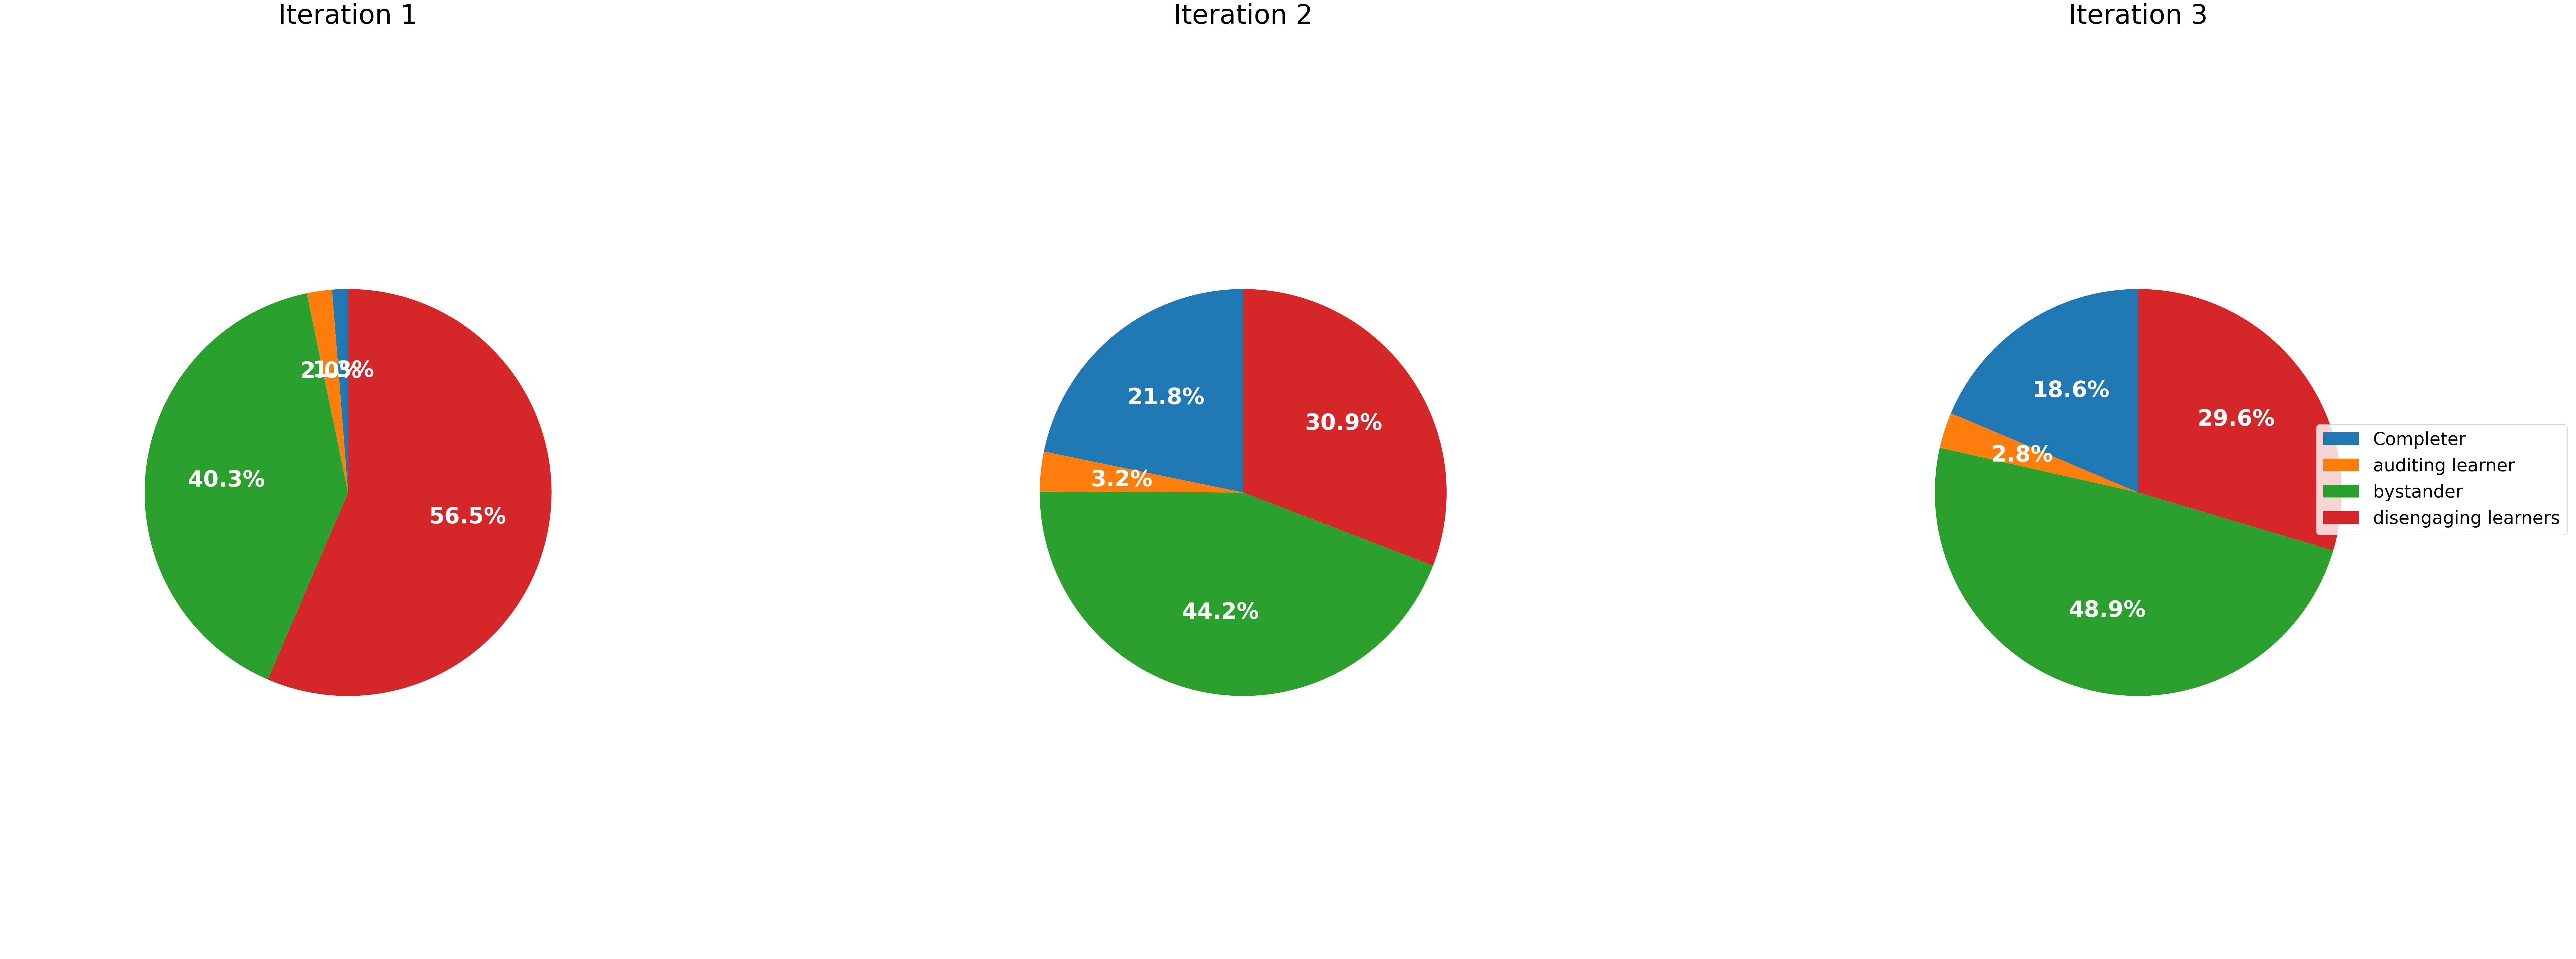

In [10]:
import matplotlib.pyplot as plt

# Créer les camemberts pour chaque itération
fig, axes = plt.subplots(1, 3, figsize=(80, 30))  # Increase figsize for larger charts

for i, iteration in enumerate(df_iteration_catParticipant.index):
    ax = axes[i]
    labels = df_iteration_catParticipant.columns
    sizes = df_iteration_catParticipant.loc[iteration]

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%',
        startangle=90,
        textprops={'color': 'white', 'fontsize': 50}  # Adjust fontsize here
    )

    # Ajuster les propriétés des labels
    for text, autotext in zip(texts, autotexts):
        text.set(size=48, fontweight='bold')  # Adjust size and fontweight here
        autotext.set(size=50, fontweight='bold')  # Adjust size and fontweight here

    ax.axis('equal')  # Assurez-vous que le camembert est un cercle
    ax.set_title(f'Iteration {iteration}', fontsize=60)  # Adjust title fontsize

# Ajouter une légende en dehors de la boucle
fig.legend(labels=df_iteration_catParticipant.columns, loc="center right", fontsize=40)  # Adjust legend fontsize
plt.tight_layout()

# Afficher les camemberts
plt.show()


Dans cette partie du note book nous allons réaliser un test d'indépendance de type CHI2.
Mais avant tout nous réalisons une heatmap des valeurs manquantes de notre jeu de données.

<Axes: >

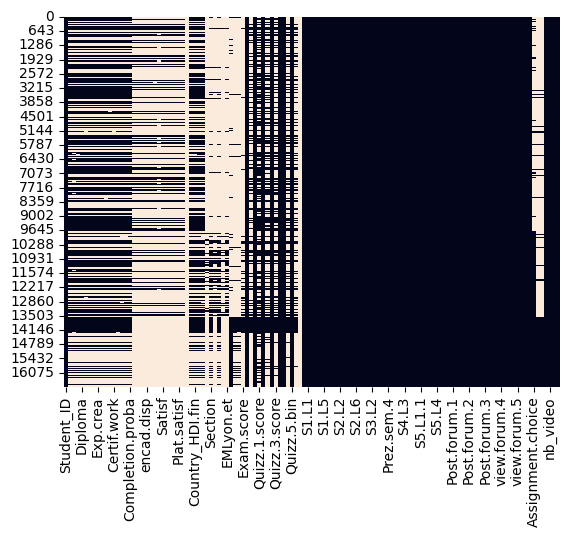

In [11]:
##Test CUI2
##Tout d'abord comptons les données manquantes
sns.heatmap(final_merge.isna(), cbar=False)

In [12]:
final_merge.isna().sum()

Student_ID                   0
Gender                    6832
birth.year                7154
Country                   6877
Diploma                   6858
                         ...  
view.forum.fonc.cours    12711
iteration                    0
nb_video                     0
nb_quizz                     0
Cat.participant              0
Length: 123, dtype: int64

Réalisation d'un test Chi2: Chi-deux est utilisé pour tester l’hypothèse nulle d’absence de relation entre deux variables catégorielles. On peut également dire que ce test vérifie l’hypothèse d’indépendance de ces variables.

Pour appliquer un chi2 il faut dans un premier temps créer une table de contingence.

In [13]:
import scipy.stats as st
#construction tableau de contingence
chi2_df = final_merge[["Gender","Country_HDI.fin"]].dropna().pivot_table(index="Gender", columns="Country_HDI.fin", aggfunc=len)
chi2_df.head()

Country_HDI.fin,B,I,TH
Gender,,,
un homme,1055,496,5024
une femme,168,261,2713


On obtient ensuite les données de test qui nous montre 

In [14]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(chi2_df)
n = chi2_df.sum().sum()  # Nombre total d'observations
cramer_v = np.sqrt(st_chi2 / (n * (min(chi2_df.shape) - 1)))

In [15]:
print("Chi-Square Statistic (st_chi2):", st_chi2)
print("P-value (st_p):", st_p)
print("Degrees of Freedom (st_dof):", st_dof)
print("Coefficient de Cramer (V):", cramer_v)

Chi-Square Statistic (st_chi2): 221.2951231668797
P-value (st_p): 8.838418635570393e-49
Degrees of Freedom (st_dof): 2
Coefficient de Cramer (V): 0.15091062586088347


Réalisation ensuite d'un mosaic plot permettant de mieux visualiser les proportions de femmes/hommes qui participent aux MOOCs en fonction des types de pays.

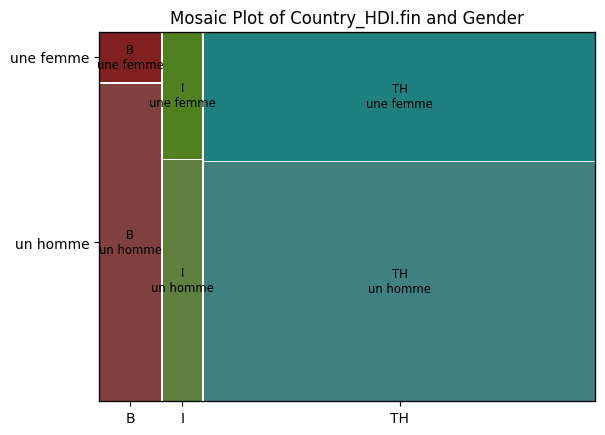

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
# Transposez les lignes et les colonnes
chi2_df = chi2_df.T

# Renommez les colonnes pour des noms plus explicites
chi2_df.columns = ['un homme', 'une femme']

# Créez le Mosaic Plot avec les proportions horizontalement
mosaic(chi2_df.stack(), title='Mosaic Plot of Country_HDI.fin and Gender', horizontal=True)

# Affichez le graphique
plt.show()

Ici nous utilisons ensuite les données d'IRIS pour montrer ce que sont des données propres.

C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

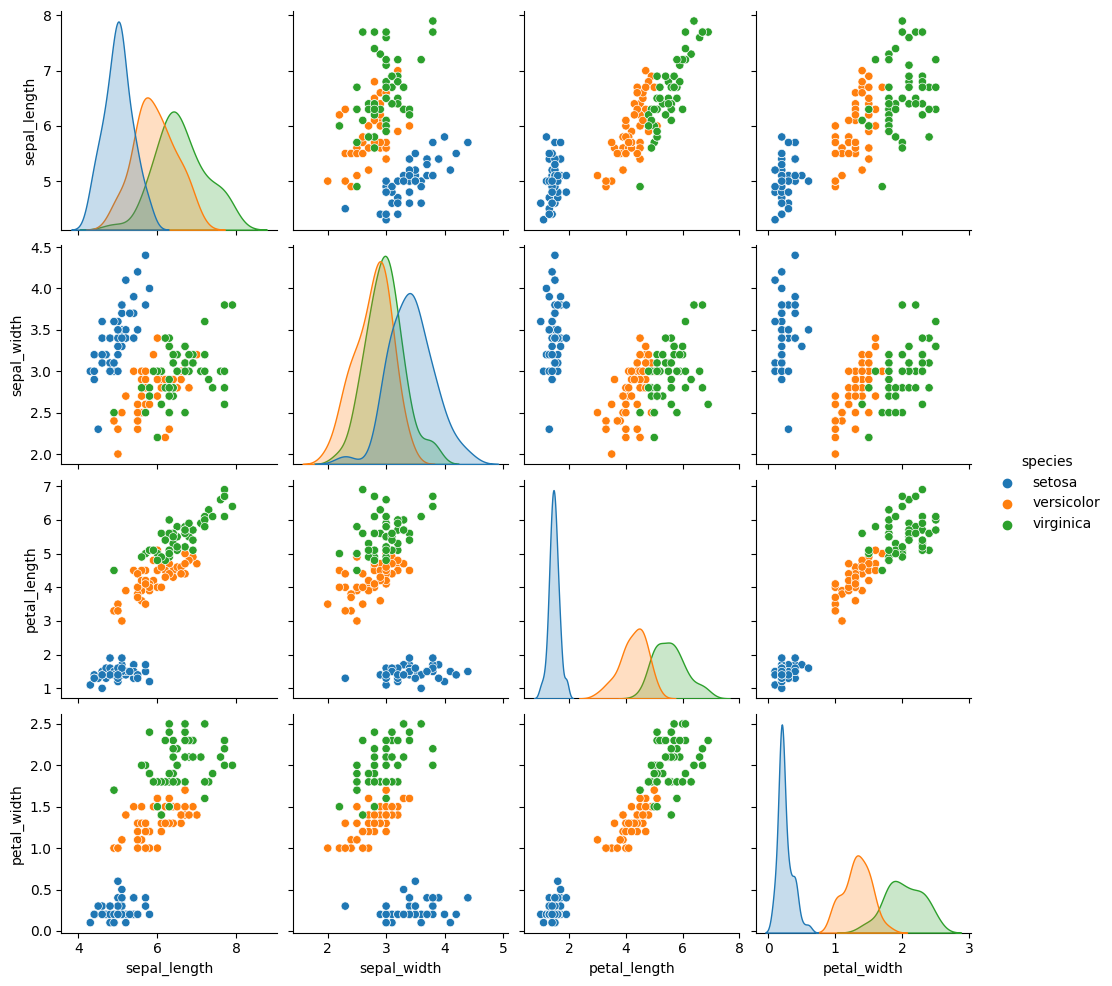

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le jeu de données Iris
iris = sns.load_dataset("iris")

# Créer une matrice de scatterplots
sns.pairplot(iris, hue="species")

# Afficher le graphique
plt.show()

In [18]:
##import tqdm from tqdm

Création d'une table d'ANOVA pour les données d'IRIS

In [19]:
from scipy.stats import f_oneway

# Charger l'ensemble de données Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, names=column_names)

# Supprimer les espaces de la classe
iris_data['class'] = iris_data['class'].str.strip()

# Séparer les données en groupes en fonction de la classe
grouped_data = [group[1] for group in iris_data.groupby('class')]

# Effectuer l'ANOVA pour chaque caractéristique
for feature in column_names[:-1]:
    group_data = [group[feature] for group in grouped_data]
    f_statistic, p_value = f_oneway(*group_data)
    
    print(f"Caractéristique : {feature}")
    print(f"F-statistic : {f_statistic}")
    print(f"p-value : {p_value}")
    print("\n")

Caractéristique : sepal_length
F-statistic : 119.26450218450468
p-value : 1.669669190769383e-31


Caractéristique : sepal_width
F-statistic : 47.36446140299382
p-value : 1.3279165184572242e-16


Caractéristique : petal_length
F-statistic : 1179.0343277002194
p-value : 3.051975801827782e-91


Caractéristique : petal_width
F-statistic : 959.3244057257613
p-value : 4.376956957488954e-85




Nous créons ensuite une table d'ANOVA pour evaluer l’effet, sur le nombre de videos vues, de l’HDI et du genre, sans nous intéeresser aux interactions
entre ces variables dans un premier temps.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create an ANOVA model
model = ols('nb_video ~ C(Country_HDI) + C(Gender)', data=final_merge).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

In [21]:
print(model.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.3099      0.368     19.854      0.000       6.588       8.032
C(Country_HDI)[T.H]        4.3199      0.741      5.831      0.000       2.868       5.772
C(Country_HDI)[T.M]        4.7224      0.772      6.120      0.000       3.210       6.235
C(Country_HDI)[T.TH]       9.4339      0.399     23.669      0.000       8.653      10.215
C(Gender)[T.une femme]    -0.0180      0.281     -0.064      0.949      -0.569       0.533


Ici nous créons une table d'ANOVA montrant les statistiques inférentielles 

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create an ANOVA model
model = ols('nb_video ~ C(Country_HDI) + C(Gender)*C(Country_HDI)', data=final_merge).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(model.summary().tables[1])

                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       7.2569      0.394     18.410      0.000       6.484       8.030
C(Country_HDI)[T.H]                             5.1566      0.857      6.016      0.000       3.476       6.837
C(Country_HDI)[T.M]                             5.4380      0.962      5.654      0.000       3.553       7.323
C(Country_HDI)[T.TH]                            9.4259      0.434     21.739      0.000       8.576      10.276
C(Gender)[T.une femme]                          0.3681      1.064      0.346      0.729      -1.717       2.453
C(Gender)[T.une femme]:C(Country_HDI)[T.H]     -3.1149      1.774     -1.756      0.079      -6.593       0.363
C(Gender)[T.une femme]:C(Country_HDI)[T.M]     -2.0085      1.737     -1.157      0.247      -5.413     

Encore une fois nous utilisons les données d'Iris qui sont des données propres pour montrer ce que sont des données normalement distribuées.

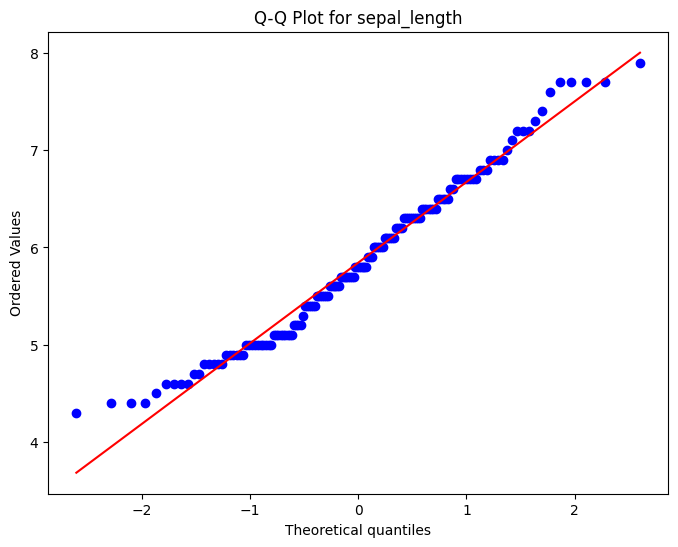

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Charger le dataset Iris
iris = sns.load_dataset("iris")

# Sélectionnez la colonne que vous souhaitez examiner (par exemple, "sepal_length")
column_name = "sepal_length"

# Créez un Q-Q plot pour la colonne sélectionnée
plt.figure(figsize=(8, 6))
stats.probplot(iris[column_name], dist="norm", plot=plt)
plt.title(f"Q-Q Plot for {column_name}")
plt.show()


Réalisation d'un QQ-plot sur notre DF

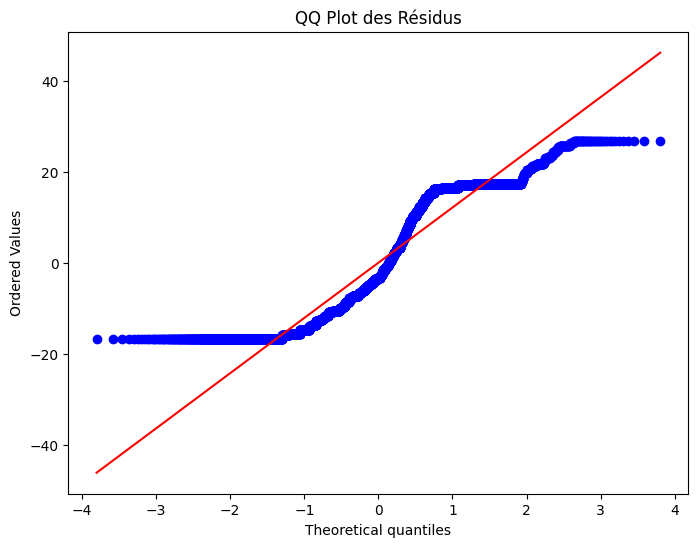

In [24]:
import scipy.stats as stats
import statsmodels.api as sm

# Charger vos données dans un DataFrame pandas
# Assurez-vous que les noms de colonnes sont corrects

# Créer un modèle d'ANOVA
model = ols('nb_video ~ C(Country_HDI) + C(Gender)*C(Country_HDI)', data=final_merge).fit()

# Récupérer les résidus du modèle
residuals = model.resid

# Créer un QQ plot des résidus
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, plot=ax, fit=True)
ax.set_title("QQ Plot des Résidus")
plt.show()

On observe que les données ne sont pas normalement distribuées

Pour éviter les erreurs de syntaxe on remplace les points dans le nom des colonnes

In [25]:
# Charger vos données dans un DataFrame pandas (assurez-vous que les noms de colonnes sont corrects)
# Supposons que votre variable binaire est nommée "Obtention_Certificat"
final = final_merge.rename(columns=lambda x: x.replace(".", "_"))
final.head()

,Student_ID,Gender,birth_year,Country,Diploma,Formation,CSP,How_heard,Exp_crea,Curiosity_MOOC,...,view_forum_5_2,last_video,last_quizz,Assignment_choice,Post_forum_fonc_cours,view_forum_fonc_cours,iteration,nb_video,nb_quizz,Cat_participant
0,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,NaN,NaN,NaN,1,0,0,bystander
1,19178.0,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,0,2,0,NaN,NaN,NaN,1,1,0,bystander
2,1086.0,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,...,1,35,4,NaN,NaN,NaN,1,34,4,disengaging learners
3,1948.0,une femme,1983.0,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,...,0,2,0,NaN,NaN,NaN,1,1,0,bystander
4,16209.0,une femme,NaN,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, ph...",Professions intermédiaires,par un ami ou une connaissance,Jai un projet de création dentreprise (phase...,1.0,...,0,0,5,NaN,NaN,NaN,1,0,5,disengaging learners


Comme nous travaillons sur des données de comptage, une régression logistique semble plus adaptée

In [2]:
import statsmodels.api as sm
import patsy

# Spécifier le modèle avec des variables catégorielles (Gender et Country_HDI)
formula = 'Exam_bin ~ C(Gender) + C(Country_HDI_fin)'

# Créer une matrice de conception avec patsy
y, X = patsy.dmatrices(formula, final, return_type='dataframe')

# Créer un modèle de régression logistique
model_1 = sm.Logit(y, X)

# Ajuster le modèle
results = model_1.fit()

# Obtenir les résumés du modèle, y compris les odds ratios
summary = results.summary()

# Afficher le résumé
print(summary)

NameError: name 'final' is not defined

In [27]:
# Extraire les coefficients et les intervalles de confiance
coef = results.params
conf_int = results.conf_int()

# Calculer les odds ratios
odds_ratios = pd.DataFrame({'Odds Ratio': np.exp(coef), 'IC Inférieur': np.exp(conf_int[0]), 'IC Supérieur': np.exp(conf_int[1])})

# Afficher la table des odds ratios
print(odds_ratios)

                          Odds Ratio  IC Inférieur  IC Supérieur
Intercept                   0.156798      0.133130      0.184674
C(Gender)[T.une femme]      1.114984      0.998240      1.245380
C(Country_HDI_fin)[T.I]     1.110600      0.858651      1.436479
C(Country_HDI_fin)[T.TH]    1.413428      1.187401      1.682481


Production d'un forest plot des odds ratios

On produit ensuite un graph afin de montrer la distribution de la variable

Optimization terminated successfully.
         Current function value: 0.467529
         Iterations 6


C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

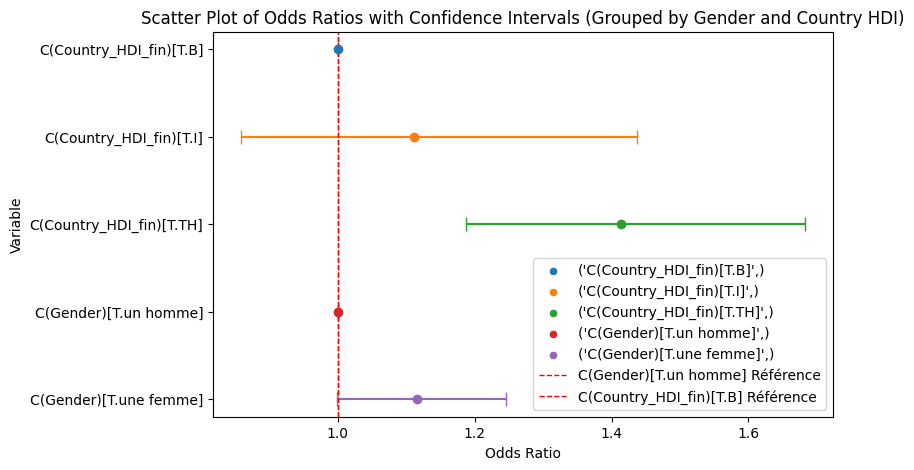

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import patsy

# Spécifier le modèle avec des variables catégorielles (Gender et Country_HDI)
formula = 'Exam_bin ~ C(Gender) + C(Country_HDI_fin)'

# Créer une matrice de conception avec patsy
y, X = patsy.dmatrices(formula, final, return_type='dataframe')

# Créer un modèle de régression logistique
model_1 = sm.Logit(y, X)

# Ajuster le modèle
results = model_1.fit()

# Extraire les coefficients et les intervalles de confiance
coef = results.params.drop('Intercept')
conf_int = results.conf_int().drop('Intercept', axis=0)

# Créer un DataFrame pour Seaborn
import pandas as pd
data = pd.DataFrame({
    'Variable': coef.index,
    'Odds Ratio': np.exp(coef),
    'Lower CI': np.exp(conf_int[0]),
    'Upper CI': np.exp(conf_int[1])
})

# Créer un DataFrame pour les valeurs de référence
reference_data = pd.DataFrame({
    'Variable': ['C(Gender)[T.un homme]', 'C(Country_HDI_fin)[T.B]'],
    'Odds Ratio': 1.0,
    'Lower CI': 1.0,
    'Upper CI': 1.0
})

# Concaténer les DataFrames
data = pd.concat([data, reference_data])

# Group by categories "Gender" and "Country HDI"
grouped_data = data.groupby(['Variable'])

# Scatter plot with error bars using Seaborn (horizontal) for each category
plt.figure(figsize=(8, 5))
for name, group in grouped_data:
    sns.scatterplot(x='Odds Ratio', y='Variable', data=group, label=name)
    plt.errorbar(group['Odds Ratio'], group['Variable'], xerr=[group['Odds Ratio'] - group['Lower CI'], group['Upper CI'] - group['Odds Ratio']], fmt='o', capsize=5)

# Ajouter des lignes verticales aux valeurs de référence
for variable, valeur_reference in zip(reference_data['Variable'], reference_data['Odds Ratio']):
    plt.axvline(x=valeur_reference, color='red', linestyle='--', linewidth=1, label=f'{variable} Référence')

plt.title('Scatter Plot of Odds Ratios with Confidence Intervals (Grouped by Gender and Country HDI)')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.legend()
plt.show()


C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


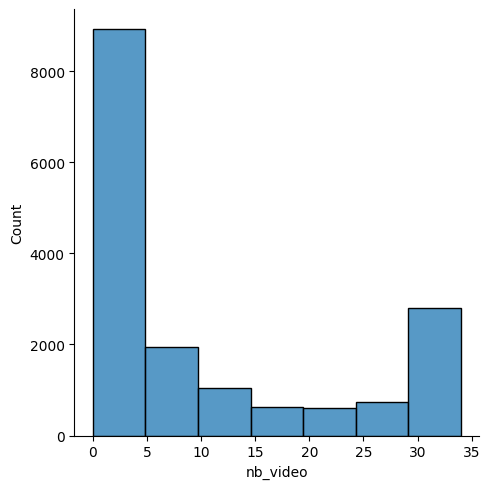

In [29]:
import seaborn as sns
sns.displot(final_merge["nb_video"], bins = 7)
plt.show()

On test encore la normalité de la variable à l'aide de quelques graphs: un qq plot et un residplot

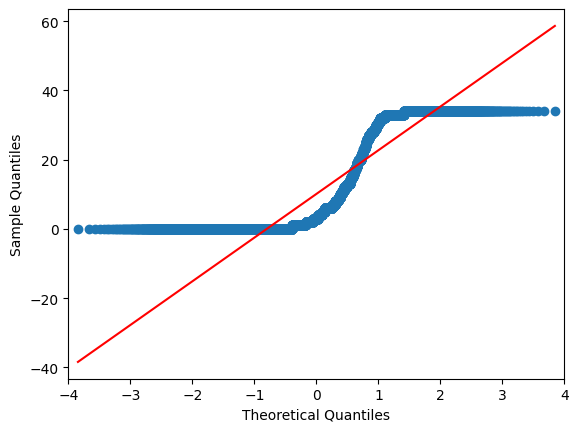

In [30]:
sm.qqplot(final_merge["nb_video"], line='s')  # 's' pour une ligne de référence

# Affiche le graphique
plt.show()

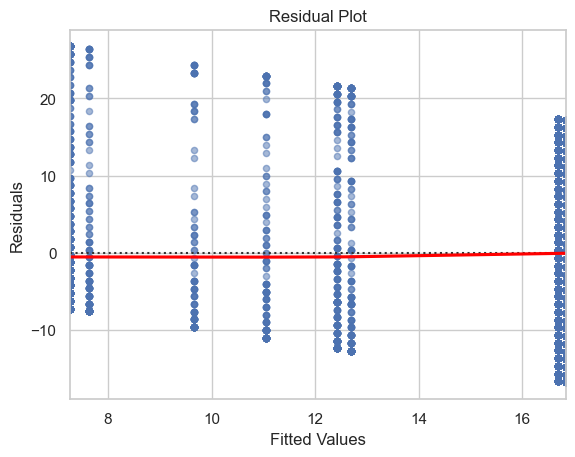

In [31]:
# Assuming you have a regression model 'model' with fitted values and residuals
sns.set(style="whitegrid")  # Set the style of the plot

# Create a residual plot with smaller scatter points
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, scatter_kws={"s": 20, "alpha": 0.5}, line_kws={"color": "red"})

# Add labels to the axes
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Set a title
plt.title("Residual Plot")

# Show the plot
plt.show()


Mobilisation d'un glm avec une loi de Poisson, en conservant les variables indépendantes
mobiliéees pour lar´egression logistique binomiale

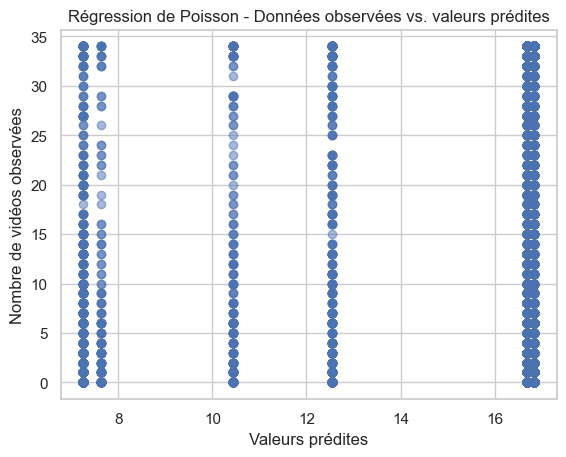

In [32]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Utilisation de Patsy pour spécifier le modèle
formula = 'nb_video ~ C(Gender) * C(Country_HDI_fin)'
model = smf.glm(formula, data=final, family=sm.families.Poisson()).fit()

# Prédictions du modèle sur les données d'entraînement
predicted_counts = model.predict(final) 

# Tracer les données observées par rapport aux valeurs prédites
plt.scatter(predicted_counts, final['nb_video'], alpha=0.5)
plt.xlabel('Valeurs prédites')
plt.ylabel('Nombre de vidéos observées')
plt.title('Régression de Poisson - Données observées vs. valeurs prédites')
plt.show()


Maintenant passons à la partie analyse de survie.
Tout d'abord, créons les déciles:

In [33]:
import numpy as np

# Créez une colonne 'statut_videos' avec des NaN
final['statut_videos'] = np.nan

# Itération 1
mask = final['iteration'] == 1
max_value_iteration_1 = final.loc[mask, 'nb_video'].max()
final.loc[mask, 'statut_videos'] = (final.loc[mask, 'nb_video'] / (max_value_iteration_1 / 10)).astype(int)

# Itération 2
mask = final['iteration'] == 2
max_value_iteration_2 = final.loc[mask, 'nb_video'].max()
final.loc[mask, 'statut_videos'] = (final.loc[mask, 'nb_video'] / (max_value_iteration_2 / 10)).astype(int)

# Itération 3
mask = final['iteration'] == 3
max_value_iteration_3 = final.loc[mask, 'nb_video'].max()
final.loc[mask, 'statut_videos'] = (final.loc[mask, 'nb_video'] / (max_value_iteration_3 / 10)).astype(int)



In [34]:
final.head()

,Student_ID,Gender,birth_year,Country,Diploma,Formation,CSP,How_heard,Exp_crea,Curiosity_MOOC,...,last_video,last_quizz,Assignment_choice,Post_forum_fonc_cours,view_forum_fonc_cours,iteration,nb_video,nb_quizz,Cat_participant,statut_videos
0,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,1,0,0,bystander,0.0
1,19178.0,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,2,0,NaN,NaN,NaN,1,1,0,bystander,0.0
2,1086.0,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,...,35,4,NaN,NaN,NaN,1,34,4,disengaging learners,10.0
3,1948.0,une femme,1983.0,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,...,2,0,NaN,NaN,NaN,1,1,0,bystander,0.0
4,16209.0,une femme,NaN,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, ph...",Professions intermédiaires,par un ami ou une connaissance,Jai un projet de création dentreprise (phase...,1.0,...,0,5,NaN,NaN,NaN,1,0,5,disengaging learners,0.0


Création d'un colonne status_vid (binaire) qui va attribuer 1 ou 0 en fonction des déciles où le participant s'est rendu.

In [35]:
# Créez une colonne 'status_vid' avec des NaN
final['status_vid'] = np.nan

# Remplissez la colonne 'status_vid' en fonction des déciles
final.loc[final['statut_videos'] < 10, 'status_vid'] = 1
final.loc[final['statut_videos'] == 10, 'status_vid'] = 0
final.head(10)

,Student_ID,Gender,birth_year,Country,Diploma,Formation,CSP,How_heard,Exp_crea,Curiosity_MOOC,...,last_quizz,Assignment_choice,Post_forum_fonc_cours,view_forum_fonc_cours,iteration,nb_video,nb_quizz,Cat_participant,statut_videos,status_vid
0,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1,0,0,bystander,0.0,1.0
1,19178.0,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,0,NaN,NaN,NaN,1,1,0,bystander,0.0,1.0
2,1086.0,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,...,4,NaN,NaN,NaN,1,34,4,disengaging learners,10.0,0.0
3,1948.0,une femme,1983.0,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,...,0,NaN,NaN,NaN,1,1,0,bystander,0.0,1.0
4,16209.0,une femme,NaN,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, ph...",Professions intermédiaires,par un ami ou une connaissance,Jai un projet de création dentreprise (phase...,1.0,...,5,NaN,NaN,NaN,1,0,5,disengaging learners,0.0,1.0
5,6685.0,un homme,1951.0,NaN,Bac+5 (Master ou équivalent),Ingénierie et technologies,Retraités,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,...,5,NaN,NaN,NaN,1,8,5,disengaging learners,2.0,1.0
6,6685.0,un homme,1951.0,NaN,Bac+5 (Master ou équivalent),Ingénierie et technologies,Retraités,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,...,0,0.0,0.0,0.0,1,0,0,bystander,0.0,1.0
7,6685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,3,8,5,disengaging learners,2.0,1.0
8,6685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,3,0,0,bystander,0.0,1.0
9,8629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1,0,0,bystander,0.0,1.0


Création des graphs avec Lifeline.
Dans un premier temps pour les catégories de participant:

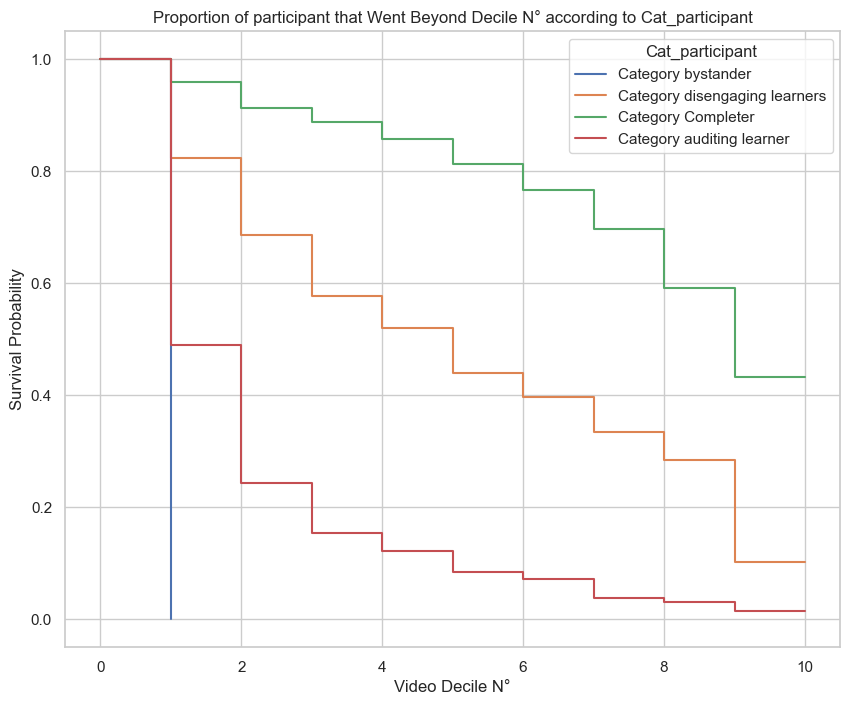

In [36]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Créez un modèle de survie Kaplan-Meier en fonction de la variable 'Cat_participant'
kmf = KaplanMeierFitter()

# Divisez les données en fonction de la variable 'Cat_participant'
categories = final['Cat_participant'].unique()

fig, ax = plt.subplots(figsize=(10, 8))

for category in categories:
    group_data = final[final['Cat_participant'] == category]
    kmf.fit(group_data['statut_videos'], event_observed=group_data['status_vid'], label=f'Category {category}')
    
    # Normalize the survival data to start at 1
    kmf.survival_function_ = kmf.survival_function_ / kmf.survival_function_.iloc[0]

    kmf.plot(ax=ax, ci_show=False)

plt.xlabel("Video Decile N°")
plt.ylabel("Survival Probability")
plt.title("Proportion of participant that Went Beyond Decile N° according to Cat_participant")

plt.legend(title="Cat_participant")

plt.show()


Puis pour les catégories de IDH:

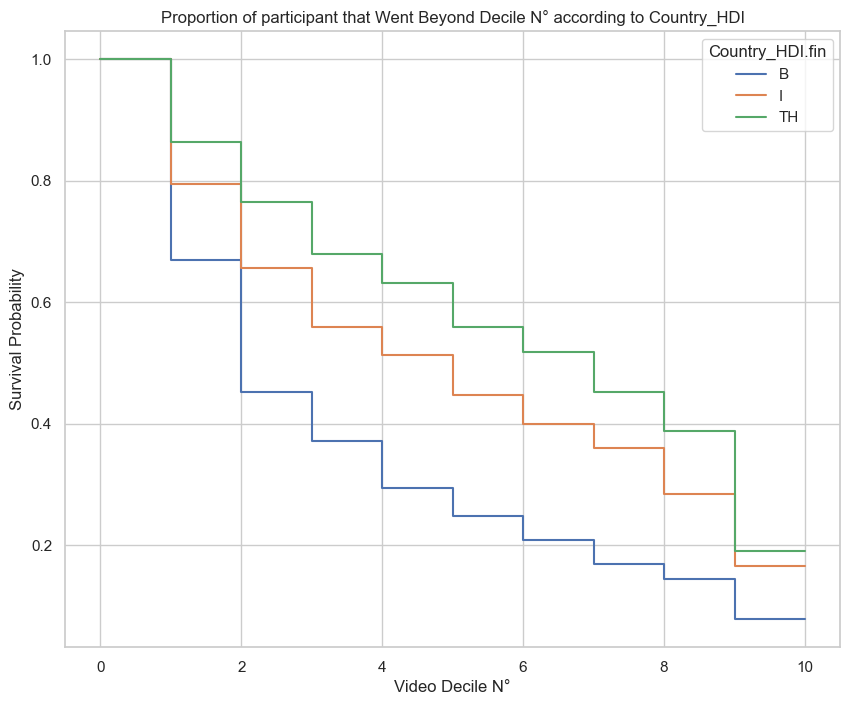

In [37]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(figsize=(10, 8))

for group_name, group_data in final.groupby('Country_HDI_fin'):
    kmf.fit(group_data['statut_videos'], event_observed=group_data['status_vid'], label=group_name)
    
    # Normalize the survival data to start at 1
    kmf.survival_function_ = kmf.survival_function_ / kmf.survival_function_.iloc[0]

    kmf.plot(ax=ax, ci_show=False)

plt.xlabel("Video Decile N°")
plt.ylabel("Survival Probability")
plt.title("Proportion of participant that Went Beyond Decile N° according to Country_HDI")

plt.legend(title="Country_HDI.fin")

plt.show()

Et enfin pour le genre:

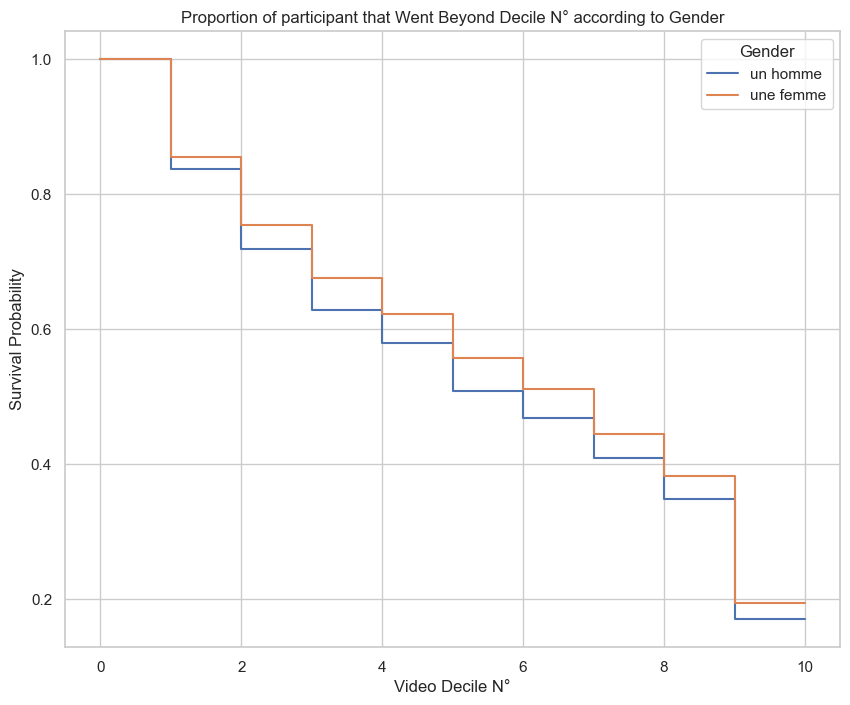

In [38]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(figsize=(10, 8))

for group_name, group_data in final.groupby('Gender'):
    kmf.fit(group_data['statut_videos'], event_observed=group_data['status_vid'], label=group_name)
    
    # Normalize the survival data to start at 1
    kmf.survival_function_ = kmf.survival_function_ / kmf.survival_function_.iloc[0]

    kmf.plot(ax=ax, ci_show=False)

plt.xlabel("Video Decile N°")
plt.ylabel("Survival Probability")
plt.title("Proportion of participant that Went Beyond Decile N° according to Gender")

plt.legend(title="Gender")

plt.show()

Pour finir, obtenons les Hazard Ratios pour différentes catégories de participants

<lifelines.CoxPHFitter: fitted with 16701 total observations, 1330 right-censored observations>
             duration col = 'statut_videos'
                event col = 'status_vid'
      baseline estimation = breslow
   number of observations = 16701
number of events observed = 15371
   partial log-likelihood = -130358.07
         time fit was run = 2024-01-06 14:21:43 UTC

---
                                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                          
C(Cat_participant)[T.auditing learner]       1.68       5.37       0.06             1.57             1.80                 4.78                 6.04
C(Cat_participant)[T.bystander]              3.68      39.67       0.04             3.60             3.76                36.60                43.01
C(Cat_participant)[T.disengaging learners]   1.05       2.85       0.03             0.98             1.11                 2.66                 3.04

                                             cmp to     z      p   -log2(p)
covariate                                                                  
C(Cat_participant)[T.auditing learner]         0.00 28.28 <0.005     582.18
C(Cat_participant)[T.bystander]                0.00 89.37 <0.005        inf
C(Cat_participant)[T.disengaging learners]     0.00 31.18 <0.005     706.72
---
Concordance = 0.83
Partial AIC = 260722.14
log-likelihood ratio test = 14186.31 on 3 df
-log2(p) of ll-ratio test = inf

covariate
C(Cat_participant)[T.auditing learner]         5.373789
C(Cat_participant)[T.bystander]               39.674360
C(Cat_participant)[T.disengaging learners]     2.845601
Name: exp(coef), dtype: float64


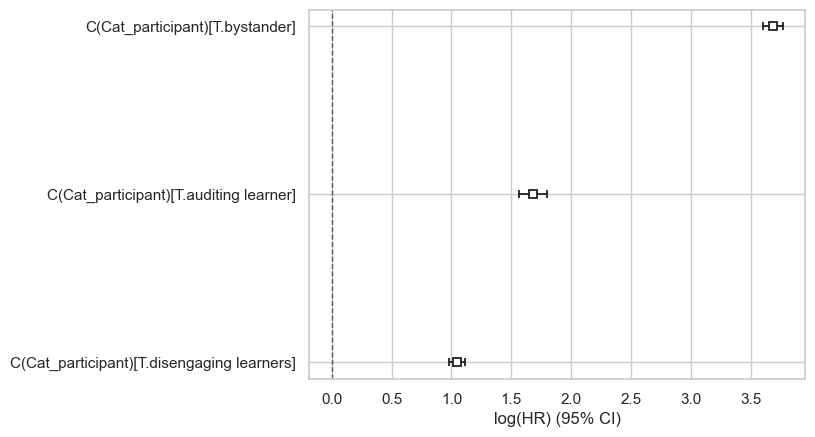

In [39]:
from lifelines import CoxPHFitter

# Créez un modèle de régression de Cox en fonction de la variable 'Cat_participant' (ou d'autres variables de votre choix)
cph = CoxPHFitter()
cph.fit(final, duration_col='statut_videos', event_col='status_vid', formula='C(Cat_participant)')

# Affichez les statistiques du modèle
cph.print_summary()

# Obtenez les Hazard Ratios pour différentes catégories de participants
hazard_ratios = cph.hazard_ratios_
print(hazard_ratios)

# Tracez la courbe de survie pour différentes catégories (si nécessaire)
cph.plot()

# Affichez le graphique
plt.show()
